In [ ]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from scipy.stats import kurtosis,skew,entropy
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing #Biblioteca para normalizar datos.
from sklearn.model_selection import train_test_split #Biblioteca para divir los datos de entrenamiento.
from keras.models import Sequential #Biblioteca para crear modelos secuenciales.
from keras.layers import Dense #Biblioteca para crear las capas de las redes neuronales (Una capa consta de una función de cálculo de tensor de entrada y tensor de salida).
from tensorflow import keras #Biblioteca para crear optimizadores.
from sklearn.metrics import roc_curve #Biblioteca para determinar datos de la curva característica operativa del receptor (ROC).
from sklearn.metrics import roc_auc_score #Biblioteca para determinar puntuaje de la clasificación de los datos.
import pandas as pd #Biblioteca para importar datos.
import numpy as np #Biblioteca para crear arreglos.
import matplotlib.pyplot as plt #Biblioteca para plotear.
from sklearn.cluster import KMeans #Biblioteca para crear el algoritmo K-means (k-medias) para agrupamiento de datos
import seaborn as sns #Biblioteca para plotear datos con plantillas específicas.
from IPython.display import Image #Biblioteca para mostrar imágenes.
from google.colab import drive #Biblioteca para importar datos desde google drive.

import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation
from keras.layers import Dropout, Dense, Flatten, BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/Iris.csv',na_values=['#NAME?'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
print(df.Species)


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [ ]:
print(df['SepalLengthCm'].value_counts())

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: SepalLengthCm, dtype: int64


In [ ]:
print(df[['Id','SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']])

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

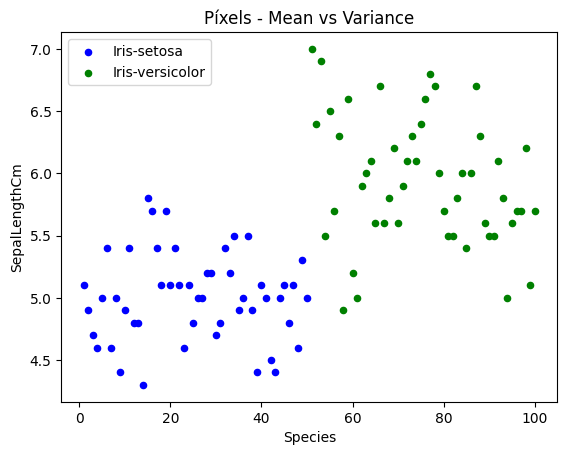

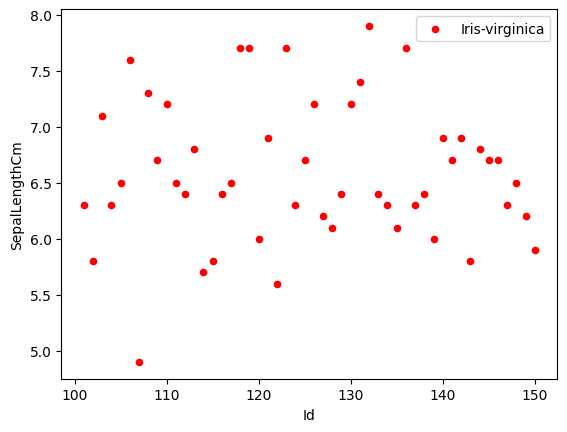

In [ ]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='Id', y='SepalLengthCm', color='blue', label='Iris-setosa')
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='Id', y='SepalLengthCm', color='red', label='Iris-virginica')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='Id', y='SepalLengthCm', color='green', label='Iris-versicolor', ax=fig)
fig.set_xlabel('Species')
fig.set_ylabel('SepalLengthCm')
fig.set_title('Píxels - Mean vs Variance')
plt.show()


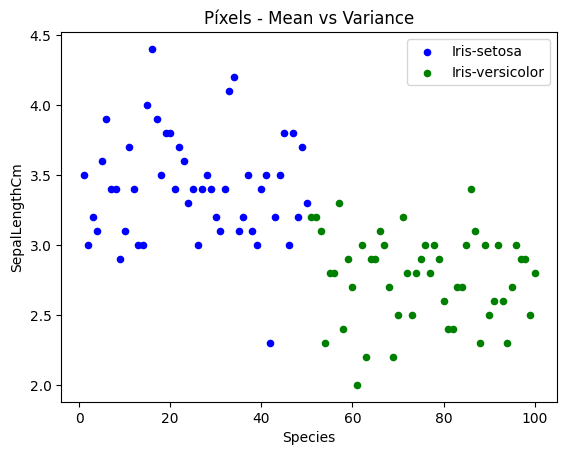

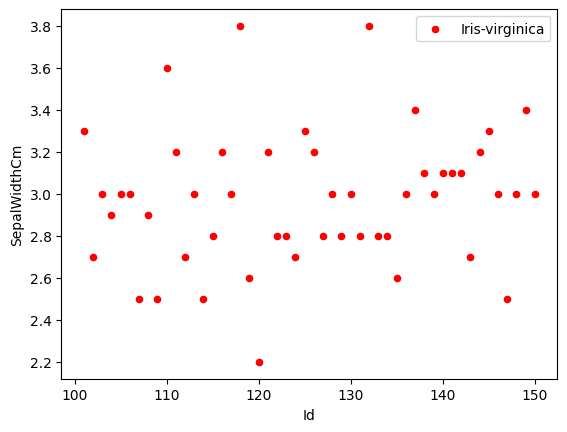

In [ ]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='Id', y='SepalWidthCm', color='blue', label='Iris-setosa')
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='Id', y='SepalWidthCm', color='red', label='Iris-virginica')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='Id', y='SepalWidthCm', color='green', label='Iris-versicolor', ax=fig)
fig.set_xlabel('Species')
fig.set_ylabel('SepalLengthCm')
fig.set_title('Píxels - Mean vs Variance')
plt.show()

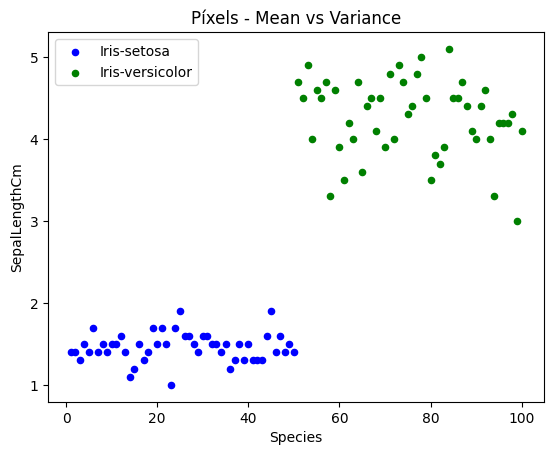

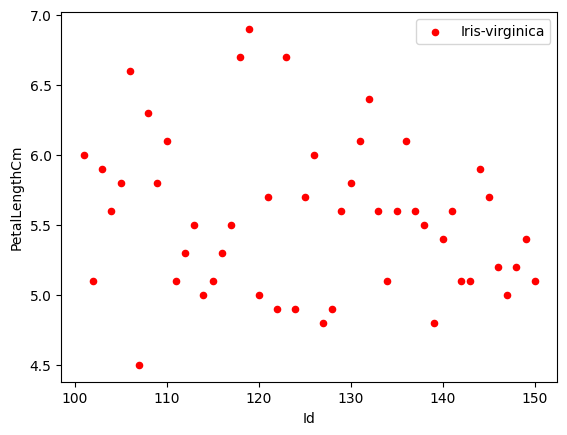

In [ ]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='Id', y='PetalLengthCm', color='blue', label='Iris-setosa')
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='Id', y='PetalLengthCm', color='red', label='Iris-virginica')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='Id', y='PetalLengthCm', color='green', label='Iris-versicolor', ax=fig)
fig.set_xlabel('Species')
fig.set_ylabel('SepalLengthCm')
fig.set_title('Píxels - Mean vs Variance')
plt.show()

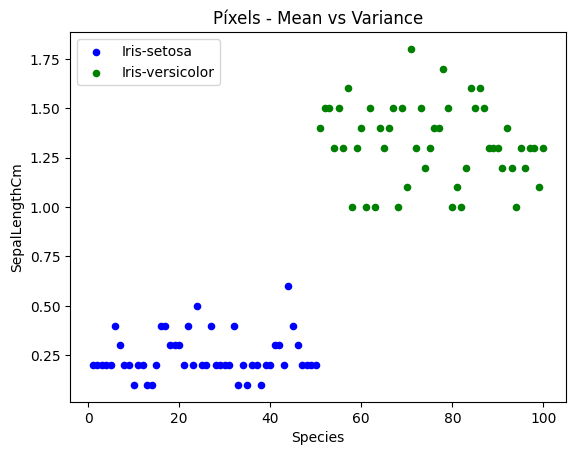

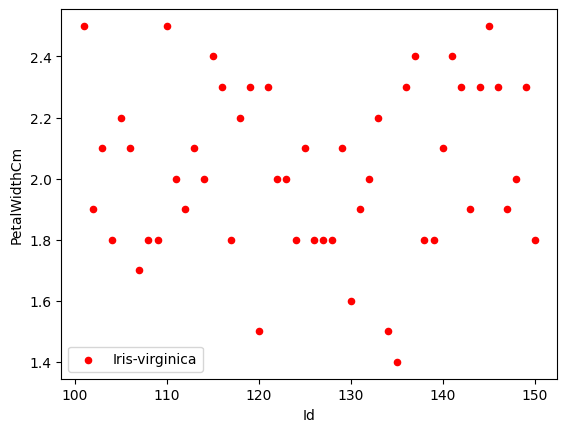

In [ ]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='Id', y='PetalWidthCm', color='blue', label='Iris-setosa')
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='Id', y='PetalWidthCm', color='red', label='Iris-virginica')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='Id', y='PetalWidthCm', color='green', label='Iris-versicolor', ax=fig)
fig.set_xlabel('Species')
fig.set_ylabel('SepalLengthCm')
fig.set_title('Píxels - Mean vs Variance')
plt.show()

In [ ]:
#Separación de todos los datos con las características definitivas y las etiquetas.
dataSet = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
X = numpy.array(dataSet.drop(['Species'], 1))
y = numpy.array(dataSet['Species'])

<ipython-input-14-13fa428482cb>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = numpy.array(dataSet.drop(['Species'], 1))


In [ ]:
#Separación los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 97 datos para entrenamiento y 53 datos para prueba


In [ ]:
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Árboles de Decisión Clasificación: 1.0


In [ ]:
X = pd.DataFrame()
X.loc[:,0] = df.loc[:,'SepalLengthCm']
X.loc[:,1] = df.loc[:,'SepalWidthCm']

cls = KMeans(init='k-means++', n_clusters=3, n_init=10)
cls.fit(X)
X['predicted_label'] = cls.labels_.astype(int)
X.columns = ['SepalLengthCm', 'SepalWidthCm','label']
X

,SepalLengthCm,SepalWidthCm,label
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,0
147,6.5,3.0,1
148,6.2,3.4,1


[[5.77358491 2.69245283]
 [6.81276596 3.07446809]
 [5.006      3.418     ]]


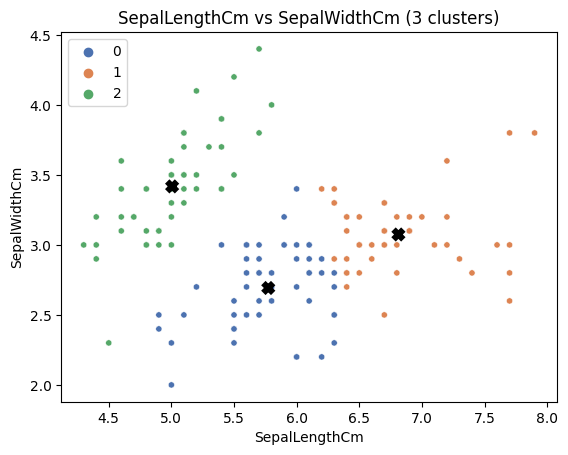

In [ ]:
centroids = cls.cluster_centers_
labels = cls.labels_
print(centroids)
centroids_x = centroids[:, 1]
centroids_y = centroids[:, 0]

sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="label",
                data=X, palette='deep', s=20);
plt.legend(loc='upper left');
plt.title("SepalLengthCm vs SepalWidthCm (3 clusters)")
plt.scatter(centroids_y,centroids_x,marker = "x", s=10,linewidths = 10, zorder = 10, c=['black','black','black'])

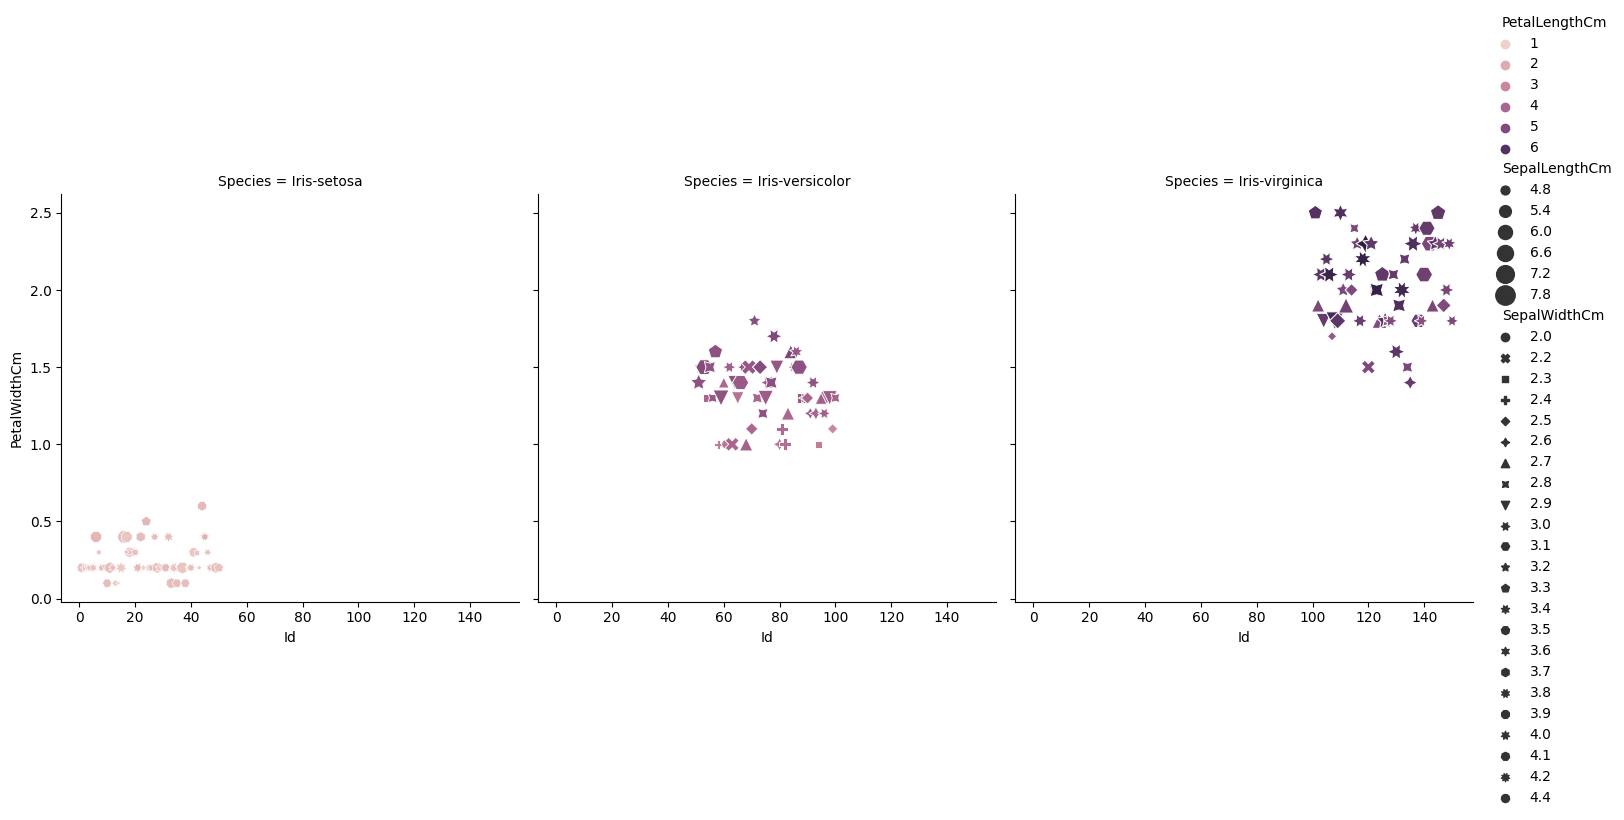

In [ ]:
sns.relplot(
    data=df, x="Id", y="PetalWidthCm", col="Species", style="SepalWidthCm", hue="PetalLengthCm", size="SepalLengthCm", sizes=(15, 200)
)

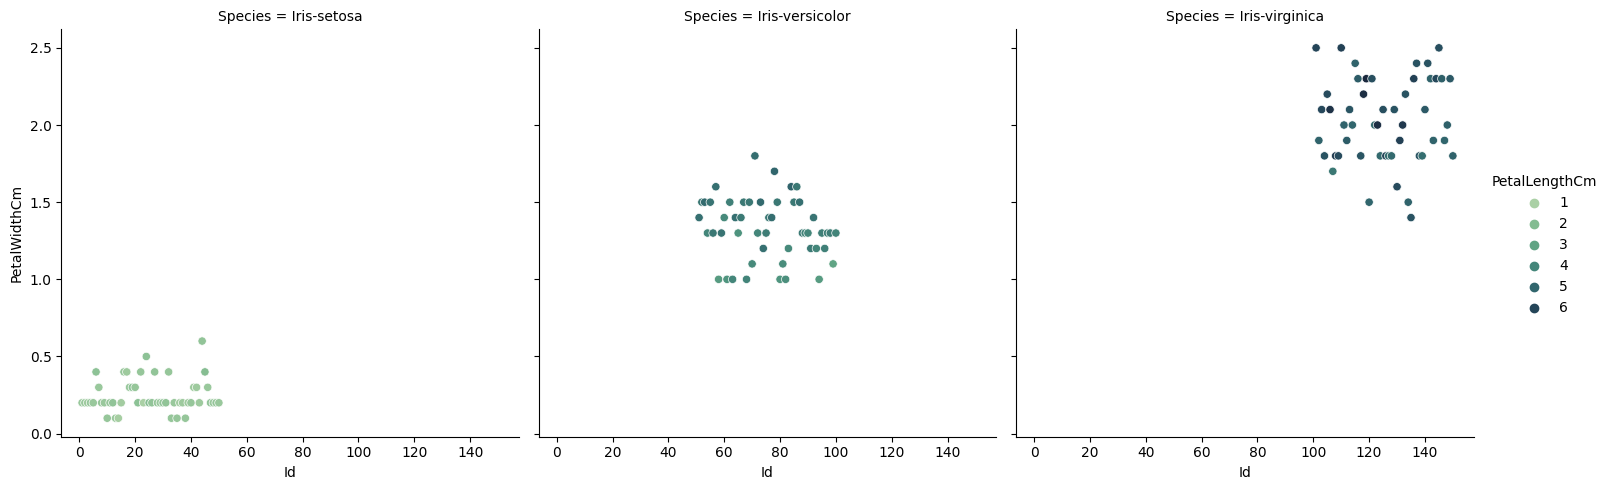

In [ ]:
sns.relplot(
    data=df, x="Id", y="PetalWidthCm", col="Species", hue="PetalLengthCm", palette="ch:r=-.5,l=.75"
)

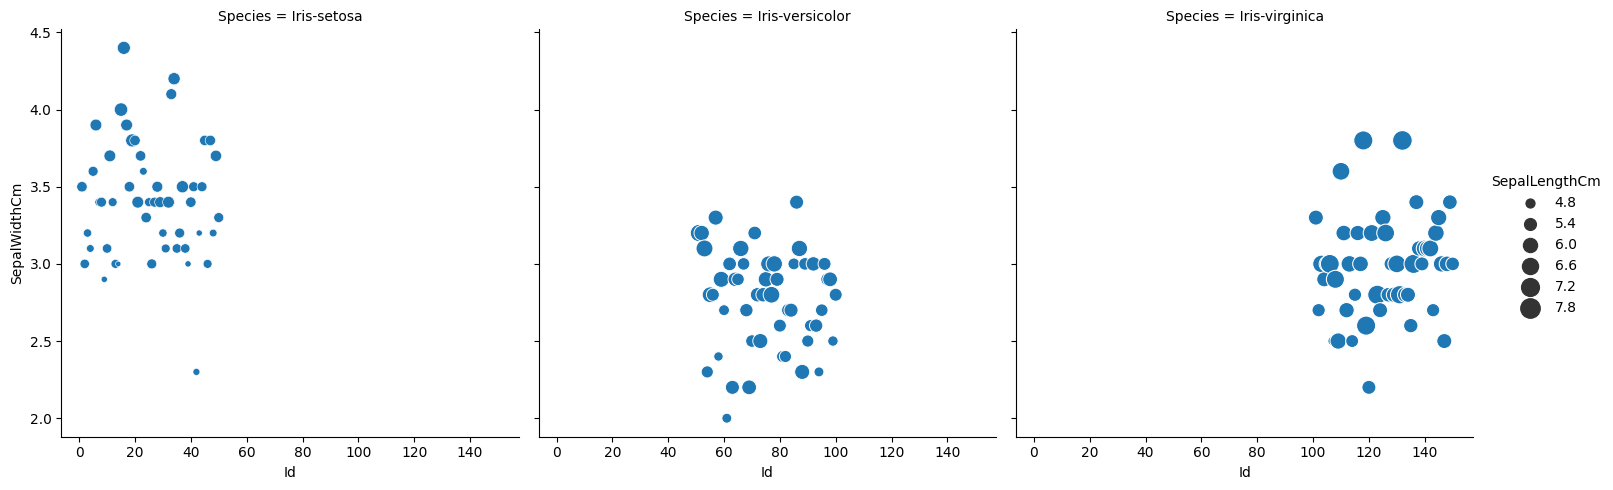

In [ ]:
sns.relplot(
    data=df, x="Id", y="SepalWidthCm", col="Species", size="SepalLengthCm", sizes=(15, 200)
)

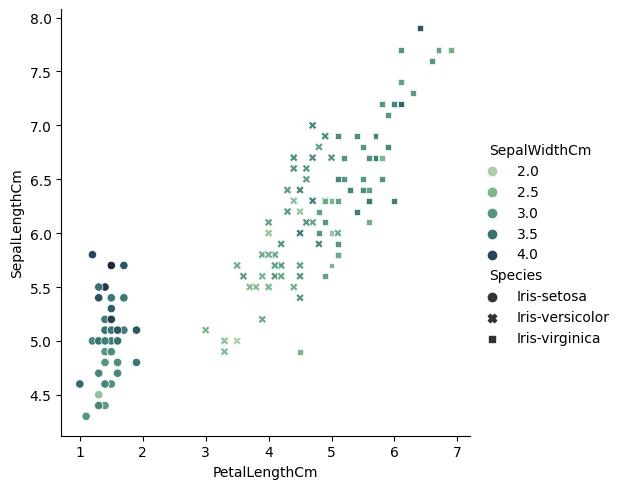

In [ ]:
sns.relplot(
    data=df, x="PetalLengthCm", y="SepalLengthCm", hue="SepalWidthCm", style="Species", palette="ch:r=-.5,l=.75"
)

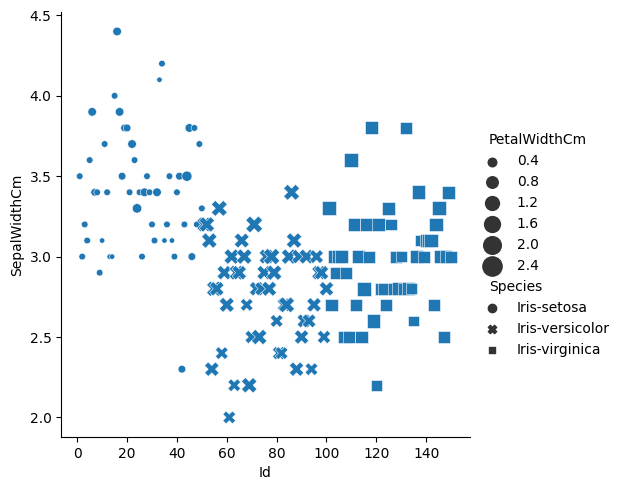

In [ ]:
sns.relplot(
    data=df, x="Id", y="SepalWidthCm", style="Species", size="PetalWidthCm", sizes=(15, 200)
)